#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}



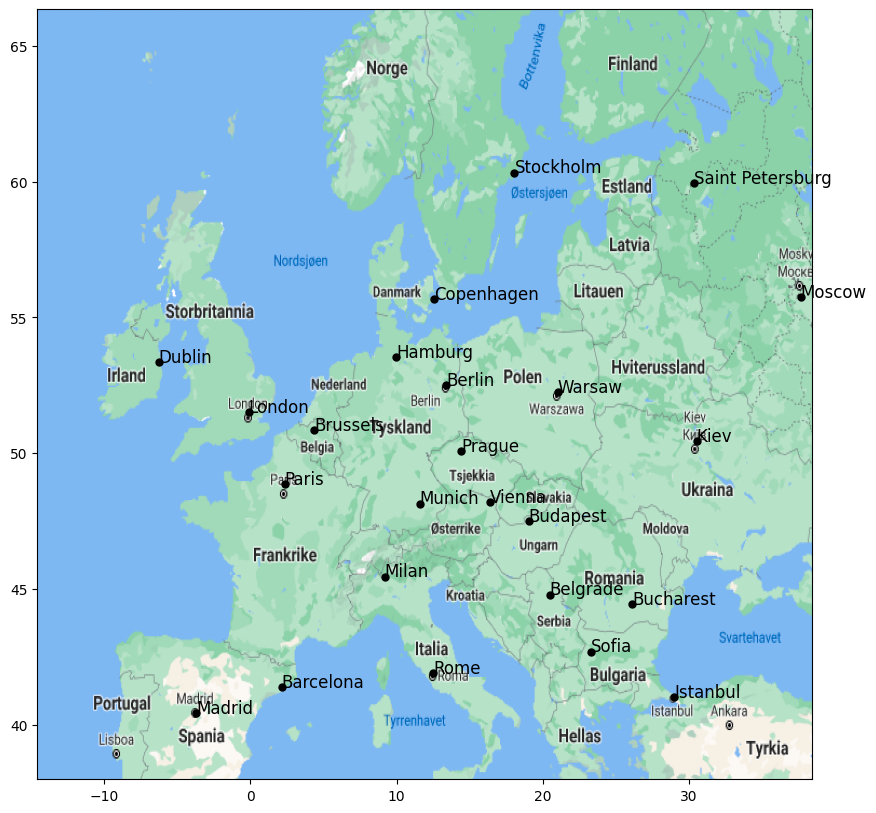

In [3]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10)) # set the size that you'd like (width, height)

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto") # plot the image



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [4]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


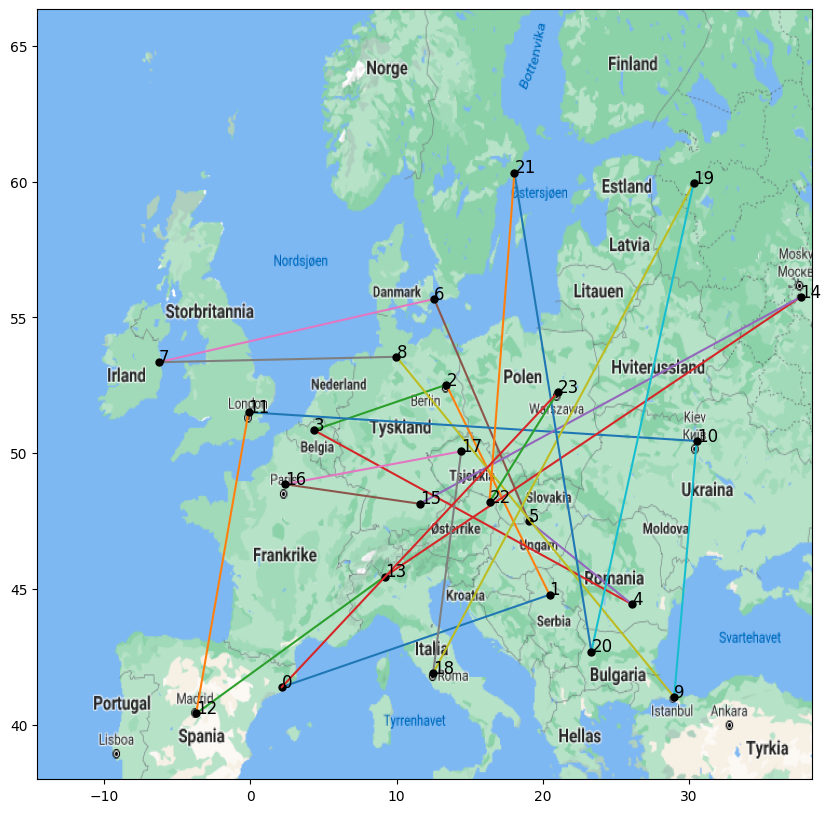

In [5]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [6]:
# Implement the algorithm here
#program to find the shortest path between cities by brute force
import itertools
import math

def find_shortest_path(city_coords):
    # Create a list of cities
    cities = list(city_coords.keys())
    # Get the number of cities
    n = len(cities)
    # Set the minimum distance to infinity
    min_distance = float('inf')
    # Set the shortest path to None
    shortest_path = None
    # Generate all permutations of the cities (all the different possible paths)
    for path in itertools.permutations(cities):
        # Initialize the distance to 0
        distance = 0
        # Calculate distance of path
        for i in range(n-1):
            # Calculate the distance between city i and city i+1
            distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
        # Add distance from last city back to first city
        distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
        # Update shortest path if distance is smaller
        if distance < min_distance:
            min_distance = distance
            shortest_path = path
    return shortest_path


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

All the times it took using exhaustive search:  []


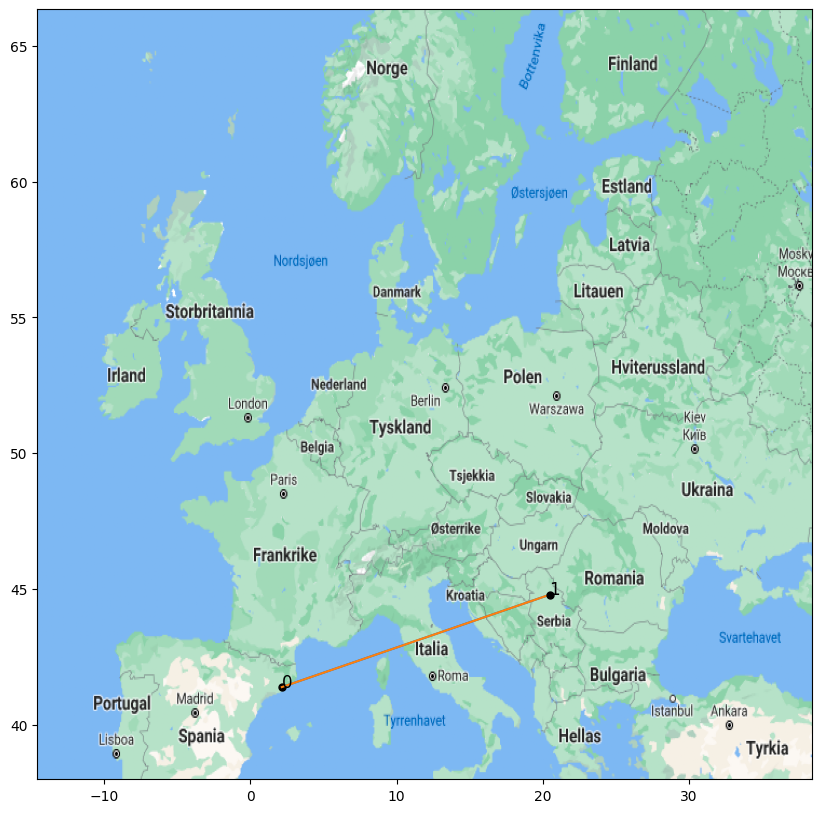

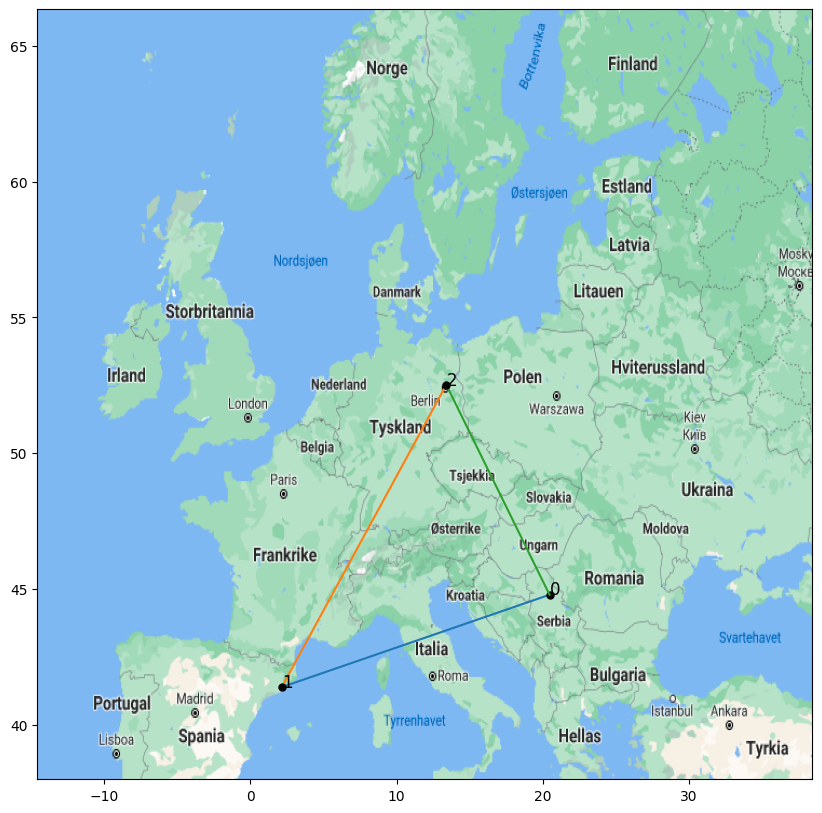

The shortest path is:  ('Belgrade', 'Barcelona', 'Berlin')
div by zero error


'\nAll the times it took using exhaustive search:  [0.0, 0.0, 0.0, 0.0, 0.001500844955444336, 0.01451253890991211, 0.13611626625061035, 1.3686752319335938, 15.084447860717773, 180.0325367450714, 2478.4434514045715]\n\ndiv by zero error\ndiv by zero error\ndiv by zero error\ndiv by zero error\nIt took  9.669579030976966  times longer to find the shortest path with  7  cities\nIt took  9.379218005585674  times longer to find the shortest path with  8  cities\nIt took  10.055192297250194  times longer to find the shortest path with  9  cities\nIt took  11.021203210791828  times longer to find the shortest path with  10  cities\nIt took  11.934976898551513  times longer to find the shortest path with  11  cities\nIt took  13.766641831604485  times longer to find the shortest path with  12  cities\n\n\nfor every city added it took 9.6 times longer to find the shortest path using exhaustive search and it look like the time it takes longer also increases by 1.1 times\nsearching for 11 cities 

In [7]:
# Answer

#first = {"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],}
timeList = []

timesToRun = 3

import time

def makeCityDict(city_coords, amount):
    first = {}
    for city in city_coords:
        if amount == 0:
            break
        first[city] = city_coords[city]
        amount -= 1
    return first

def BruteForceCalcPlot(city_coords):
    path = None
    for i in range(timesToRun - 1):
        start_time = time.time()
        #call the function
        path = find_shortest_path(makeCityDict(city_coords, i+2))
        end_time = time.time()
        timeList.append(end_time - start_time)
        plot_plan(path)
    print("The shortest path is: ", path)
    return path


def distance(path):
    distance = 0
    for i in range(len(path)-1):
        distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
    # Add distance from last city back to first city
    distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
    #print("The total distance is: ", distance)
    return distance



print("All the times it took using exhaustive search: ", timeList)

#print how many times longer it took in average for each city added
def timeCalc(timeList):
    for i in range(len(timeList)-1):
        try:
            print("It took ", timeList[i+1]/timeList[i], " times longer to find the shortest path with ", i+3, " cities")
        except:
            print("div by zero error")

def eachStepDistanceBrute():
    distance(BruteForceCalcPlot(makeCityDict(city_coords, timesToRun)))
    timeCalc(timeList)

eachStepDistanceBrute()

"""
All the times it took using exhaustive search:  [0.0, 0.0, 0.0, 0.0, 0.001500844955444336, 0.01451253890991211, 0.13611626625061035, 1.3686752319335938, 15.084447860717773, 180.0325367450714, 2478.4434514045715]

div by zero error
div by zero error
div by zero error
div by zero error
It took  9.669579030976966  times longer to find the shortest path with  7  cities
It took  9.379218005585674  times longer to find the shortest path with  8  cities
It took  10.055192297250194  times longer to find the shortest path with  9  cities
It took  11.021203210791828  times longer to find the shortest path with  10  cities
It took  11.934976898551513  times longer to find the shortest path with  11  cities
It took  13.766641831604485  times longer to find the shortest path with  12  cities


for every city added it took 9.6 times longer to find the shortest path using exhaustive search and it look like the time it takes longer also increases by 1.1 times
searching for 11 cities too 44 minutes and 38 seconds, for all 24 cities it would take 4.47e13 minues or 7.45e11 hours or 3.13e10 days or 8.5e8 years on my computer
"""



## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [8]:
# Implement the hill climbing algorithm here
#program to find the shortest path between cities using hill climbing


import random
import math



def hill_climb(city_coords):
    cities = list(city_coords.keys())
    n = len(cities)
    # Start with a random path through the cities
    path = random.sample(cities, n)
    # Calculate the distance of the initial path
    distance = 0
    for i in range(n-1):
        distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
    # Add distance from last city back to first city
    distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
    while True:
        improved = False
        # Iterate over all pairs of cities
        for i in range(n-1):
            for j in range(i+1, n):
                # Swap the two cities in the path
                new_path = path[:]
                new_path[i], new_path[j] = new_path[j], new_path[i]
                # Calculate the distance of the new path
                new_distance = 0
                for k in range(n-1):
                    new_distance += math.sqrt((city_coords[new_path[k]][0] - city_coords[new_path[k+1]][0])**2 + (city_coords[new_path[k]][1] - city_coords[new_path[k+1]][1])**2)
                # Add distance from last city back to first city
                new_distance += math.sqrt((city_coords[new_path[-1]][0] - city_coords[new_path[0]][0])**2 + (city_coords[new_path[-1]][1] - city_coords[new_path[0]][1])**2)
                # If the new path is shorter, keep it
                if new_distance < distance:
                    path = new_path
                    distance = new_distance
                    improved = True
                    break
            if improved:
                break
        # If no improvement was made in the last iteration, return the current path
        if not improved:
            return path

timesToRun = 20
timeList = []

def HillClimbCalcPlot(timesToRun, timeList):
    path = None
    for i in range(timesToRun - 1):
        start_time = time.time()
        #call the function
        path = hill_climb(makeCityDict(city_coords, i+2))
        end_time = time.time()
        timeList.append(end_time - start_time)
        plot_plan(path)
    print("The shortest path is: ", path)
    return path

#method that takes in path and sums the distance between each city

def eachStepDistanceHill():
    distance(HillClimbCalcPlot(timesToRun, timeList))
    timeCalc(timeList)


def bestOutOf(amounts):
    shortest = 0
    shortestpath = None
    for i in range(amounts):
        path = hill_climb(makeCityDict(city_coords, timesToRun))
        if i == 0:
            shortest = distance(path)
        else:
            if distance(path) < shortest:
                shortest = distance(path)
                shortestpath = path
    print("The shortest distance was: ", shortest, " \nand the path was: ", shortestpath)



#eachStepDistanceHill()
bestOutOf(100)




The shortest distance was:  130.8597673798849  
and the path was:  ['Kiev', 'Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Prague', 'Munich', 'Milan', 'Rome', 'Barcelona', 'Madrid', 'Dublin', 'London', 'Paris', 'Brussels', 'Hamburg', 'Berlin', 'Copenhagen', 'Saint Petersburg', 'Moscow']


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [14]:
# Implement the algorithm here
#program to find the shortest path between cities using genetic algorithm

import numpy as np
import random
import math


def ShortestPathGenetic(city_coords, population_size=50, mutation_rate=0.4, generations=100):
    cities = list(city_coords.keys())
    n = len(cities)


    # Create initial population, the population is a list of paths that have been randomly generated
    population = []
    for i in range(population_size):
        # Create a random path through the cities, and add it to the population
        population.append(random.sample(cities, n))
        


    for generation in range(generations):
        
        # Calculate fitness of each path
        # A list of all the fitness values of the paths in the population
        fitness = []
        for path in population:
            #here we will append the fitness of each path to the fitness list
            #the fitness path is the inverse of the distance
            #we inverse is so that the shorter paths get the higher fitness, we do it by dividing 1 by the distance
            fitness.append( 1 / distance(path))
            

        # Normalize fitness values
        fitness_sum = sum(fitness)

        #fitness = [f / fitness_sum for f in fitness]
        fitnessNorm = []
        for f in fitness:
            fitnessNorm.append(f / fitness_sum)
        
        # Create new population
        new_population = []


        # Select the best individual from the current population
        #we use max() to find the highest fitness value, and then use the value to find the index of the path, use that index to find the best path yet
        highestFitness = max(fitnessNorm)
        best_individual = population[fitnessNorm.index(highestFitness)]
        
        
        
        for i in range(population_size):
            
            # Select two random paths
            # randon.choises() wil pick a random path from 'population' and return as a list,  
            # 'fitnessNorm' is the is a the weights of the paths correspongind to the odds of being picked
            path1 = random.choices(population, fitnessNorm)[0]
            path2 = random.choices(population, fitnessNorm)[0]
            

            # Perform crossover
            path = crossover(path1, path2)


            # Perform mutation
            if random.random() < mutation_rate:
                path = mutate(path)

            
            # Add new path to new population
            new_population.append(path)

            
        # Compare the best individual with the worst individual in the new population
        worst_fitness = min([1 / distance(path) for path in new_population])
        if 1 / distance(best_individual) > worst_fitness:
            new_population[new_population.index(min(new_population, key=lambda x: 1 / distance(x)))] = best_individual
        population = new_population
    # Return best path
    best_path = population[0]
    best_distance = distance(best_path)
    for path in population:
        path_distance = distance(path)
        if path_distance < best_distance:
            best_path = path
            best_distance = path_distance
    return best_path

def crossover(path1, path2):
    n = len(path1)
    # Select random crossover point
    crossover_point = random.randint(0, n-1)
    # Create new path
    if crossover_point == 0:
        if distance(path1) > distance(path2):
            return path2
        return path1
    else:
        path1end = path1[crossover_point:]
        path2end = path2[crossover_point:]
        distP1Beg = distance(path1[:crossover_point])
        distP2Beg = distance(path2[:crossover_point])

        if(distP1Beg > distP2Beg):
            path = path2[:crossover_point]
        else:
            path = path1[:crossover_point]

        if(len(path1end) != 0 and len(path2end) != 0):
            if(distance(path2end) > distance(path1end)):
                for city in path1:
                    if city not in path:
                        path.append(city)
                return path
            
        for city in path2:
            if city not in path:
                path.append(city)
        return path


def mutate(path):
    n = len(path)
    # Select two random cities
    city1 = random.randint(0, n-1)
    city2 = random.randint(0, n-1)
    # Swap the two cities in the path
    path[city1], path[city2] = path[city2], path[city1]
    # Apply inversion mutation
    if random.random() < 0.1: #<-- got tip from GPT to implement inversion mutation for better results
        # Select a subpath of length at least 2
        subpath = path[city1:city2+1]
        if len(subpath) >= 2:
            # Reverse the order of the subpath
            path[city1:city2+1] = subpath[::-1]

    return path

def distance1(city_coords, path):
    distance = 0
    n = len(path)
    for i in range(n-1):
        distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
    # Add distance from last city back to first city
    distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
    return distance


timesToRun = 20
timeList = []
distList = []

def geneticCalcPlot(timesToRun, timeList):
    path = None
    shortest = 0
    for i in range(100):
        start_time = time.time()
        #call the function
        path = ShortestPathGenetic(makeCityDict(city_coords, timesToRun))
        if(shortest == 0):
            shortest = distance(path)
        if(distance(path) < shortest):
            shortest = distance(path)
        end_time = time.time()
        timeList.append(end_time - start_time)
        print("distance: ", distance(path))
        distList.append(distance(path))
    print("The shortest path is: ", path)
    print("The shortest distance is: ", shortest)
    print("The avrage distance is: ", sum(distList)/len(distList))
    plot_plan(path)
    return path

#method that takes in path and sums the distance between each city

distance(geneticCalcPlot(timesToRun, timeList))


#ukjent = ShortestPathGenetic(makeCityDict(city_coords, 10))
#print(ukjent)


timeCalc(timeList)
"""
mutation_rate = 0.1; avrage distance =  159.3
mutation_rate = 0.2; avrage distance =  153.78
mutation_rate = 0.3; avrage distance =  149.24
mutation_rate = 0.4; avrage distance =  147.09 <-- best (146.07, )
mutation_rate = 0.5; avrage distance =  147.6
mutation_rate = 0.6; avrage distance =  147.78

"""


distance:  139.49249122254727
distance:  134.3355901243931
distance:  148.58010435045307
distance:  177.38750639640784


KeyboardInterrupt: 

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [10]:
# Answer

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [11]:
# Implement algorithm here

some code i didnt get to use

In [12]:




""" 
def find_shortest_path(city_coords):
    #get the cities
    cities = list(city_coords.keys())
    #get the number of cities
    n = len(cities)
    #create a dictionary to store the distances
    distances = {}
    #loop through the cities
    for i in range(n):
        #loop through the cities again
        for j in range(n):
            #get the distance between the cities
            distance = np.sqrt((city_coords[cities[i]][0] - city_coords[cities[j]][0])**2 + (city_coords[cities[i]][1] - city_coords[cities[j]][1])**2)
            #store the distance in the dictionary
            distances[cities[i], cities[j]] = distance
    #create a list to store the path
    path = []
    #add the first city to the path
    path.append(cities[0])
    #create a list of the remaining cities
    remaining_cities = cities[1:]
    #loop through the remaining cities
    for i in range(n-1):
        #create a list to store the distances
        distances_to_cities = []
        #loop through the remaining cities
        for j in range(len(remaining_cities)):
            #get the distance between the last city in the path and the remaining cities
            distance = distances[path[-1], remaining_cities[j]]
            #add the distance to the list
            distances_to_cities.append(distance)
        #get the index of the minimum distance
        index = distances_to_cities.index(min(distances_to_cities))
        #add the city with the minimum distance to the path
        path.append(remaining_cities[index])
        #remove the city from the list of remaining cities
        remaining_cities.remove(remaining_cities[index])
    #return the path
    return path
"""





"""
hill climb: 

import random
import math

def find_shortest_path(city_coords):
    cities = list(city_coords.keys())
    n = len(cities)
    # Start with a random path through the cities
    path = random.sample(cities, n)
    # Calculate the distance of the initial path
    distance = 0
    for i in range(n-1):
        distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 +
                              (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
    # Add distance from last city back to first city
    distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 +
                          (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
    while True:
        improved = False
        # Iterate over all pairs of cities
        for i in range(n-1):
            for j in range(i+1, n):
                # Swap the two cities in the path
                new_path = path[:]
                new_path[i], new_path[j] = new_path[j], new_path[i]
                # Calculate the distance of the new path
                new_distance = 0
                for k in range(n-1):
                    new_distance += math.sqrt((city_coords[new_path[k]][0] - city_coords[new_path[k+1]][0])**2 +
                                              (city_coords[new_path[k]][1] - city_coords[new_path[k+1]][1])**2)
                # Add distance from last city back to first city
                new_distance += math.sqrt((city_coords[new_path[-1]][0] - city_coords[new_path[0]][0])**2 +
                                          (city_coords[new_path[-1]][1] - city_coords[new_path[0]][1])**2)
                # If the new path is shorter, keep it
                if new_distance < distance:
                    path = new_path
                    distance = new_distance
                    improved = True
                    break
            if improved:
                break
        # If no improvement was made in the last iteration, return the current path
        if not improved:
            return path

"""





""" 
def hill_climb(city_coords):
    # Create a list of cities
    cities = list(city_coords.keys())
    # Get the number of cities
    n = len(cities)
    # Set the minimum distance to infinity
    min_distance = float('inf')
    # Set the shortest path to None
    shortest_path = None
    # Generate a random path
    path = list(cities)
    random.shuffle(path)
    # Set the current path to the random path
    current_path = path
    # Set the current distance to the distance of the random path
    current_distance = 0
    # Calculate distance of path
    for i in range(n-1):
        # Calculate the distance between city i and city i+1
        current_distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
    # Add distance from last city back to first city
    current_distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
    # Set the best path to the current path
    best_path = current_path
    # Set the best distance to the current distance
    best_distance = current_distance
    # Set the number of iterations to 0
    iterations = 0
    # Set the number of iterations without improvement to 0
    iterations_without_improvement = 0
    # Set the maximum number of iterations without improvement to 1000
    max_iterations_without_improvement = 1000
    # While the number of iterations without improvement is less than the maximum number of iterations without improvement
    while iterations_without_improvement < max_iterations_without_improvement:
        # Increment the number of iterations
        iterations += 1
        # Increment the number of iterations without improvement
        iterations_without_improvement += 1
        # Generate a random path
        path = list(cities)
        random.shuffle(path)
        # Set the current path to the random path
        current_path = path
        # Set the current distance to the distance of the random path
        current_distance = 0
        # Calculate distance of path
        for i in range(n-1):
            # Calculate the distance between city i and city i+1
            current_distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)
        # Add distance from last city back to first city
        current_distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_coords[path[0]][1])**2)
        # If the current distance is less than the best distance
        if current_distance < best_distance:
            # Set the best path to the current path
            best_path = current_path
            # Set the best distance to the current distance
            best_distance = current_distance
            # Set the number of iterations without improvement to 0
            iterations_without_improvement = 0
    # Return the best path
    return best_path
"""

" \ndef hill_climb(city_coords):\n    # Create a list of cities\n    cities = list(city_coords.keys())\n    # Get the number of cities\n    n = len(cities)\n    # Set the minimum distance to infinity\n    min_distance = float('inf')\n    # Set the shortest path to None\n    shortest_path = None\n    # Generate a random path\n    path = list(cities)\n    random.shuffle(path)\n    # Set the current path to the random path\n    current_path = path\n    # Set the current distance to the distance of the random path\n    current_distance = 0\n    # Calculate distance of path\n    for i in range(n-1):\n        # Calculate the distance between city i and city i+1\n        current_distance += math.sqrt((city_coords[path[i]][0] - city_coords[path[i+1]][0])**2 + (city_coords[path[i]][1] - city_coords[path[i+1]][1])**2)\n    # Add distance from last city back to first city\n    current_distance += math.sqrt((city_coords[path[-1]][0] - city_coords[path[0]][0])**2 + (city_coords[path[-1]][1] - city_